In [14]:
import os
import gym

In [15]:
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [16]:
environment_name="LunarLander-v2"

In [17]:
env=gym.make(environment_name)

In [18]:
print("_____OBSERVATION SPACE_____ \n")
print("\nHorizontal pad coordinate (x)\nVertical pad coordinate (y)\nHorizontal speed (x)\nVertical speed (y)\nAngle\nAngular speed\nIf the left leg has contact point touched the land\nIf the right leg has contact point touched the land \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation \n", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 


Horizontal pad coordinate (x)
Vertical pad coordinate (y)
Horizontal speed (x)
Vertical speed (y)
Angle
Angular speed
If the left leg has contact point touched the land
If the right leg has contact point touched the land 

Observation Space Shape (8,)
Sample observation 
 [ 2.477508    1.2416991  -0.31333417  1.2095631  -0.08823553 -0.34479815
 -0.6632477  -1.0353281 ]


In [19]:
print("\n _____ACTION SPACE_____ \n")
print("\n0 Do nothing, \n1 Fire left orientation engine,\n2 Fire the main engine,\n3 Fire right orientation engine. \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 


0 Do nothing, 
1 Fire left orientation engine,
2 Fire the main engine,
3 Fire right orientation engine. 

Action Space Shape 4
Action Space Sample 2


In [20]:
from matplotlib import animation
import matplotlib.pyplot as plt
import gym 

def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)

Episode:1 Score:-220.90505244456108
Episode:2 Score:-192.67039241802138
Episode:3 Score:-414.7466603139815
Episode:4 Score:-194.17592925773675
Episode:5 Score:-250.98959406912914
Episode:6 Score:-114.88152563987651
Episode:7 Score:-360.5846361725649
Episode:8 Score:-121.72635033986649
Episode:9 Score:-110.35048694293076


MovieWriter imagemagick unavailable; using Pillow instead.


Episode:10 Score:-108.7042777777709


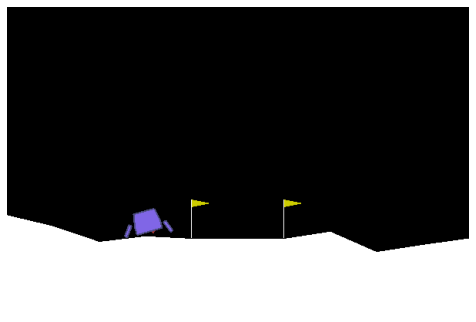

In [21]:
# Create environment
env = gym.make(environment_name)

episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    frames = []
    while not done:
        env.render()
        frames.append(env.render(mode="rgb_array"))
        action =  env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()
save_frames_as_gif(frames)

In [22]:
logPPO_path=os.path.join('Training','Logs','PPO')
logPPO_path

'Training\\Logs\\PPO'

In [23]:
# Create environment
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [24]:
# Instantiate the agent
modelPPO = PPO('MlpPolicy', env, verbose=1,tensorboard_log=logPPO_path)

Using cpu device


In [25]:
# PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model_3')
# # modelPPO.save(PPO_path)
# modelPPO=PPO.load(PPO_path,env=env)

In [26]:
# modelPPO=PPO.load(PPO_path,env=env)
# # Train the agent
# modelPPO.learn(total_timesteps=int(2e5))
# # modelPPO=PPO.load(PPO_path,env=env)

In [27]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model_5')
modelPPO=PPO.load(PPO_path,env=env)
# Train the agent
modelPPO.learn(total_timesteps=int(2e5))
modelPPO.save(PPO_path)
PPO_path

Logging to Training\Logs\PPO\PPO_8
-----------------------------
| time/              |      |
|    fps             | 359  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 295          |
|    iterations           | 2            |
|    time_elapsed         | 13           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0069683893 |
|    clip_fraction        | 0.0462       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | 0.511        |
|    learning_rate        | 0.0003       |
|    loss                 | 62.9         |
|    n_updates            | 740          |
|    policy_gradient_loss | -0.00322     |
|    value_loss           | 64.6         |
------------------------

'Training\\Saved Models\\PPO_model_5'

In [28]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model_6')
# # Train the agent
# modelPPO.learn(total_timesteps=int(2e5))
modelPPO.save(PPO_path)

In [29]:
evaluate_policy(modelPPO, env, n_eval_episodes=10, render=True)

c:\Users\arpit\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(40.6853510637907, 103.18317462523846)

Episode:1 Score:[-55.601254]
Episode:2 Score:[138.83296]
Episode:3 Score:[47.43411]
Episode:4 Score:[102.1571]
Episode:5 Score:[148.59135]
Episode:6 Score:[137.56448]
Episode:7 Score:[-132.19383]
Episode:8 Score:[-88.07239]
Episode:9 Score:[148.51947]


MovieWriter imagemagick unavailable; using Pillow instead.


Episode:10 Score:[146.46532]


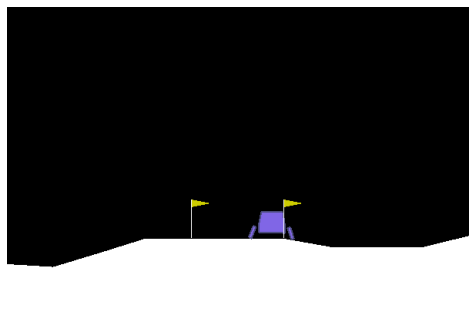

In [30]:
episodes = 10
for episode in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0 
    frames = []
    while not done:
        env.render()
        frames.append(env.render(mode="rgb_array"))
        action , _ = modelPPO.predict(obs)
        obs, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()
save_frames_as_gif(frames)

In [31]:
import imageio
import numpy as np

images = []
obs = modelPPO.env.reset()
img = modelPPO.env.render(mode="rgb_array")
for i in range(3500):
    images.append(img)
    action, _ = modelPPO.predict(obs)
    obs, _, _ ,_ = modelPPO.env.step(action)
    img = modelPPO.env.render(mode="rgb_array")
imageio.mimsave("lander_ppo5.gif", [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)

In [32]:
# !pip install imageio-ffmpeg

In [33]:
import gym
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

env_id = "LunarLander-v2"
video_folder = "logs/videos/"
video_length = 1000

env = DummyVecEnv([lambda: gym.make(env_id)])

obs = env.reset()

# Record the video starting at the first step
env = VecVideoRecorder(env, video_folder,
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix=f"random-agent-3-{env_id}")

env.reset()
for _ in range(video_length + 1):
  action = [env.action_space.sample()]
  obs, _, _, _ = env.step(action)
# Save the video
env.close()

Saving video to d:\aimlreinforcemetopenaigym\lunarLander_PPO_git\logs\videos\random-agent-3-LunarLander-v2-step-0-to-step-1000.mp4
